In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [18,10]

### Unsupervised learning basics
- Everyday example: Google news
- How does Google News classify articles?
- Unsuperviesed Learning Algorithm
- Match frequent terms in articles to find similarity 

### What is unsupervised learning?
- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified or characterized
- The objective of the algorithm is to interpret any structure in the data
- Common unsuperized learning algorithms: clustering, neural networks, anomaly detection

### What is clustering?
- The process of grouping items with similar characteristics
- Items in groups similar to each other than in other groups
- Example: distance between points on a 2D plane 


In [3]:
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

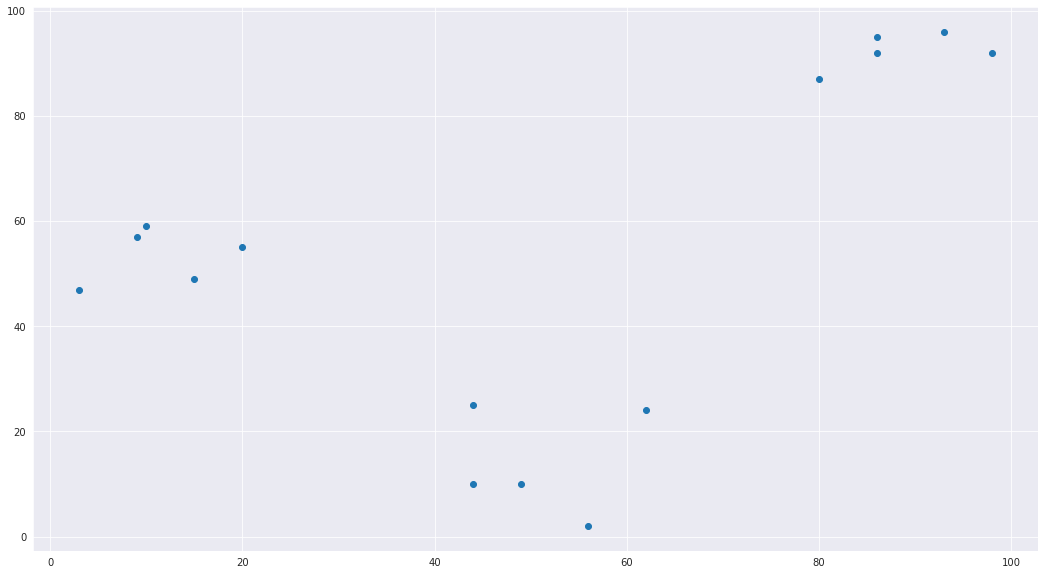

In [4]:
plt.scatter(x_coordinates, y_coordinates)
plt.show()

### Basics of cluster analysis

### What is a cluster?
- A group of items with similar characteristics
- Google News: articles where similar words and word associations appear together
- Customer Segments

### Clustering algorithms
- Hierarchical clustering
- K means clustering
- Other clustering algorithms: DBSCAN, Gaussian Methods

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                  'y_coordinate': y_coordinates})

In [6]:
Z = linkage(df, 'ward')
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

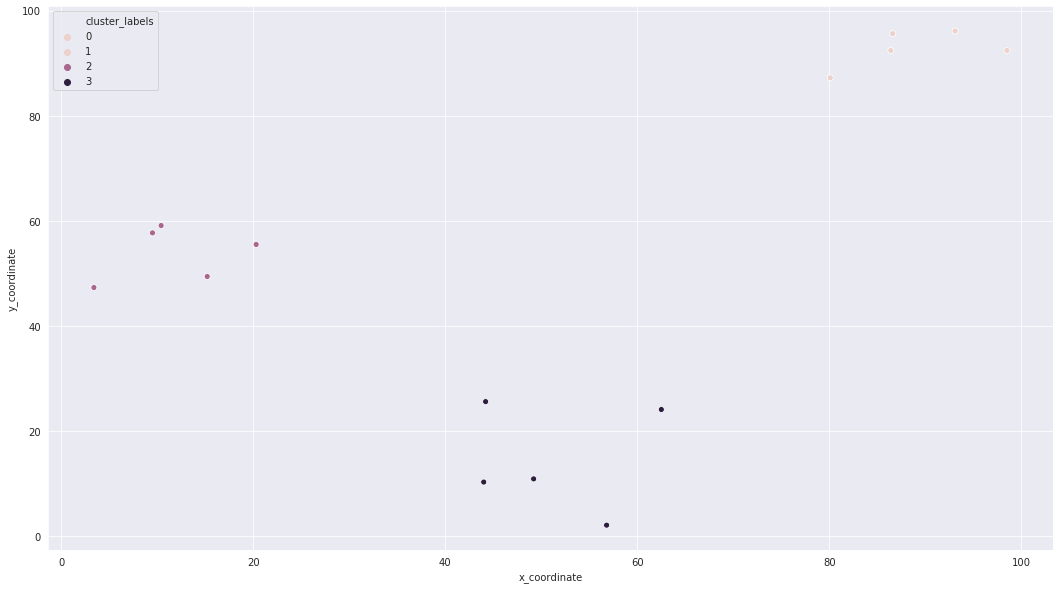

In [7]:
ax = sns.scatterplot(x='x_coordinate', y='y_coordinate',
               hue='cluster_labels', data=df)
plt.show()

In [8]:
from scipy.cluster.vq import kmeans, vq

import random
random.seed((1000,2000))

In [9]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                  'y_coordinate': y_coordinates})

In [10]:
centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

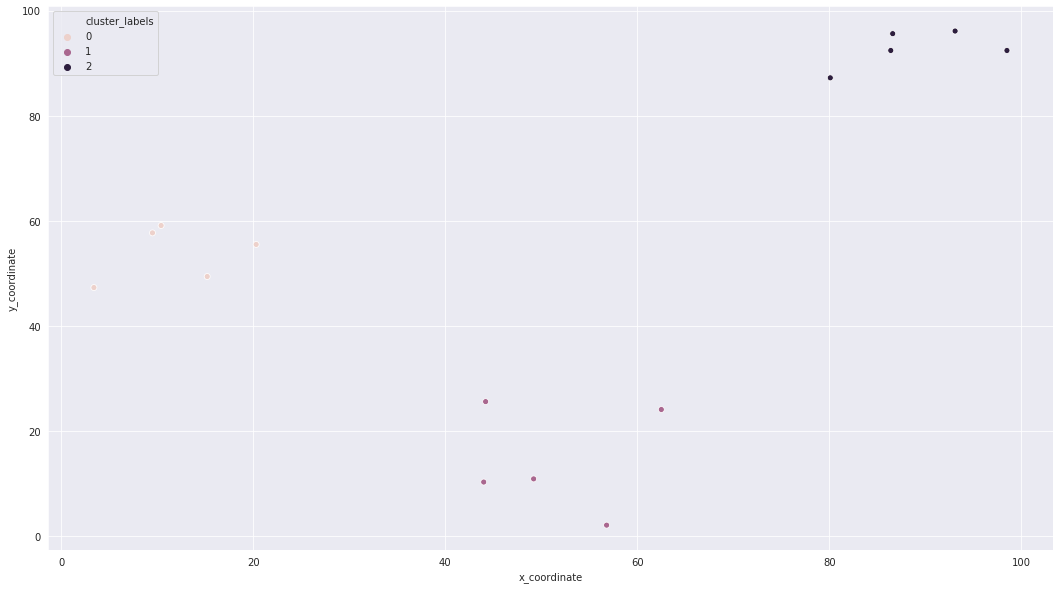

In [11]:
sns.scatterplot(x='x_coordinate', y='y_coordinate',
               hue='cluster_labels', data = df)
plt.show()

In [12]:
x_coord = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y_coord = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

df = pd.DataFrame({'x': x_coord,
                  'y': y_coord})

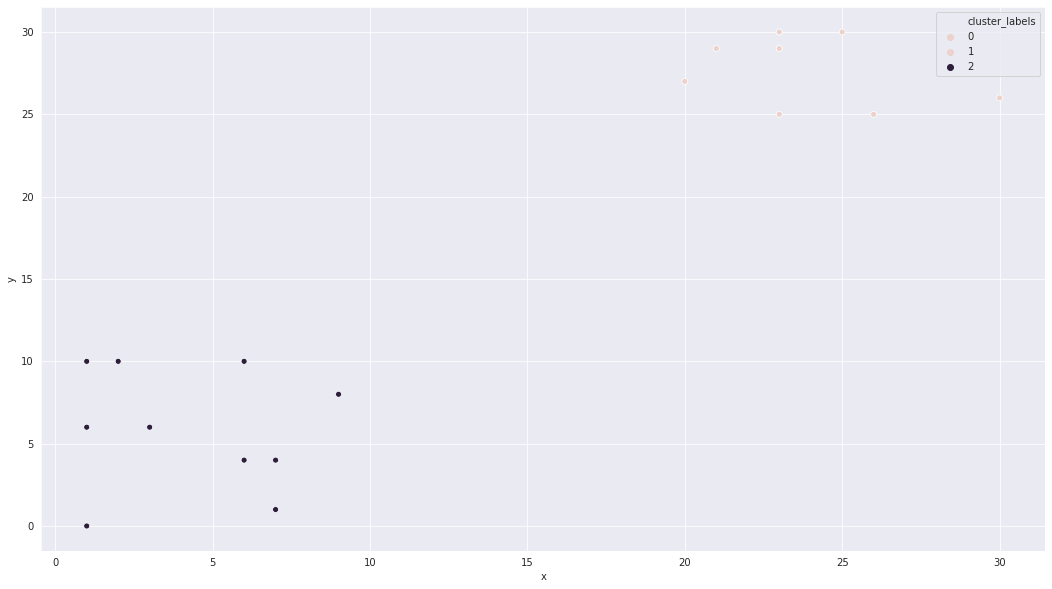

In [13]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

In [14]:
df = df.astype('float')

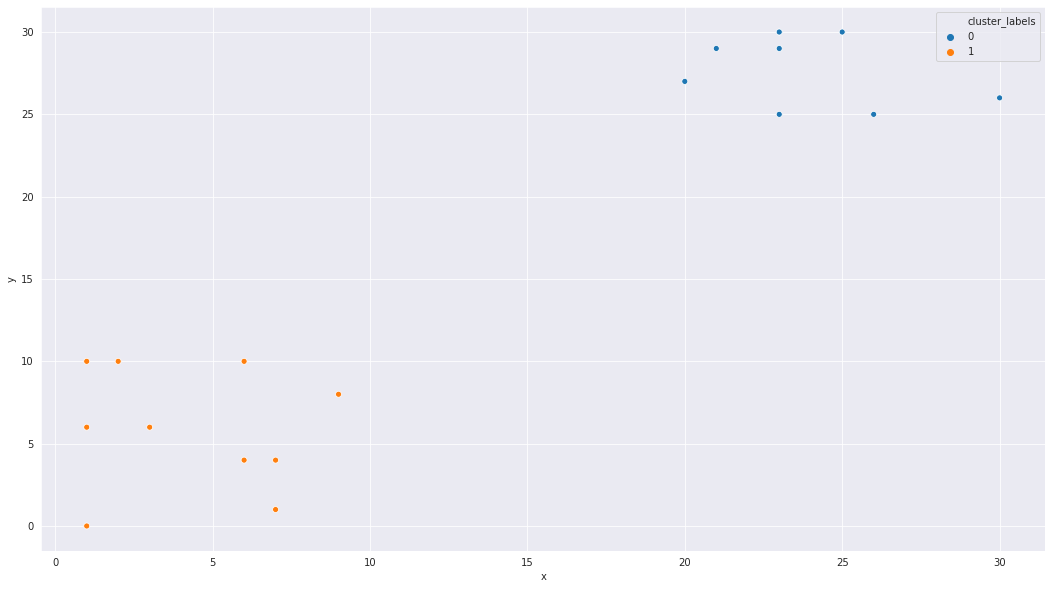

In [15]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

### Data preperation for cluster analysis 

### Why do we need to prepare data for clustering?

- Variables have incomparable units (product dimension in cm, price in \\$)
- Variables with same units have vastly different scales and variances (expenditures on cereals, travel)
- Data in raw form may lead to bias in clustering
- Clustering may be heavily dependent on one variable
- Solution: normalization of individual variables

### Normalization of data
- Normalization: process of rescaling data to a standard deviation of 1 
> x_new = x/std_dev(x)

In [16]:
from scipy.cluster.vq import whiten

In [17]:
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]

In [18]:
scaled_data = whiten(data)
print(scaled_data)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


### Illustration: normalization of data

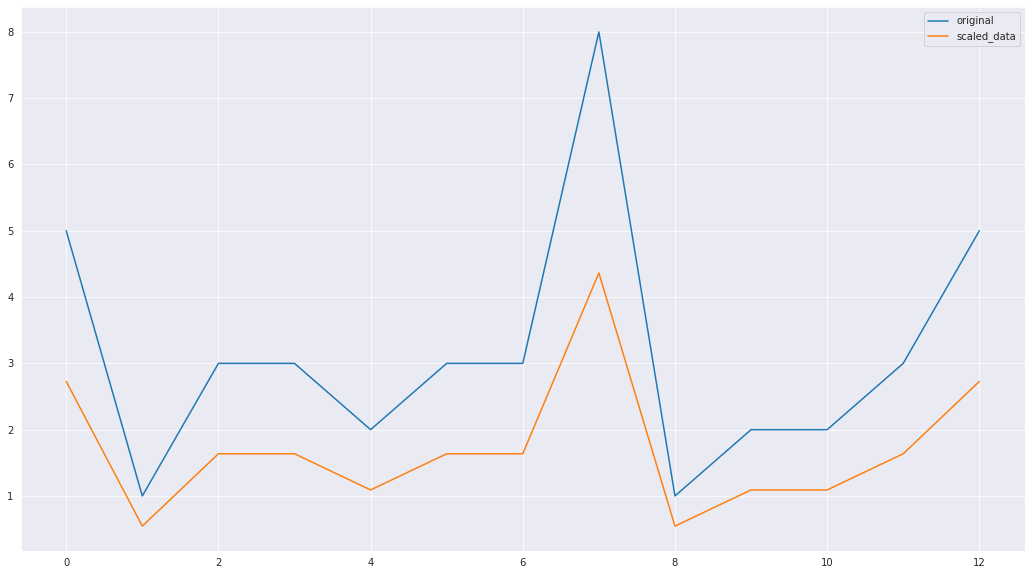

In [20]:
plt.plot(data, label='original')
plt.plot(scaled_data, label='scaled_data')

plt.legend()
plt.show()

In [21]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


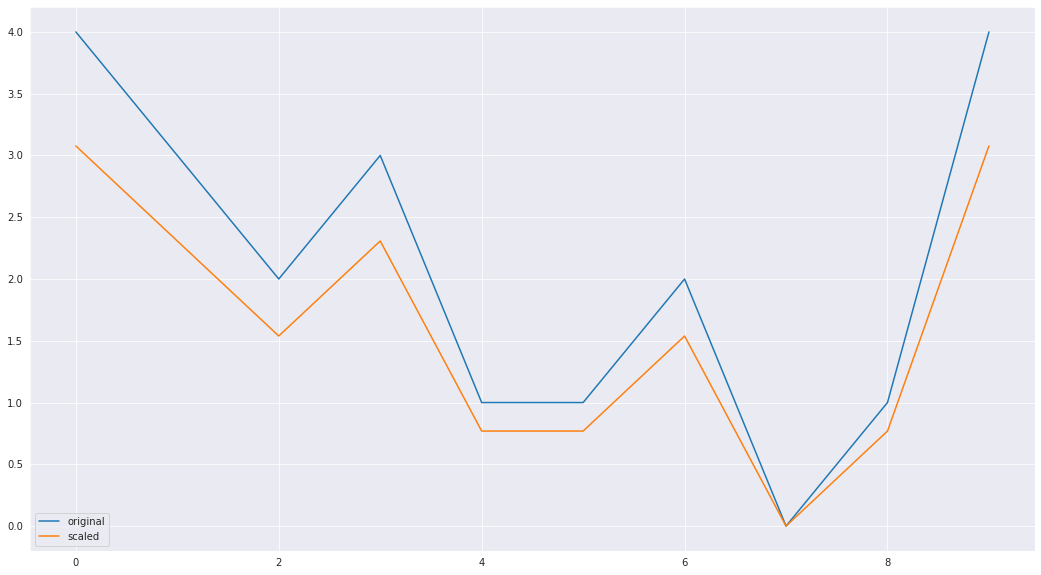

In [22]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

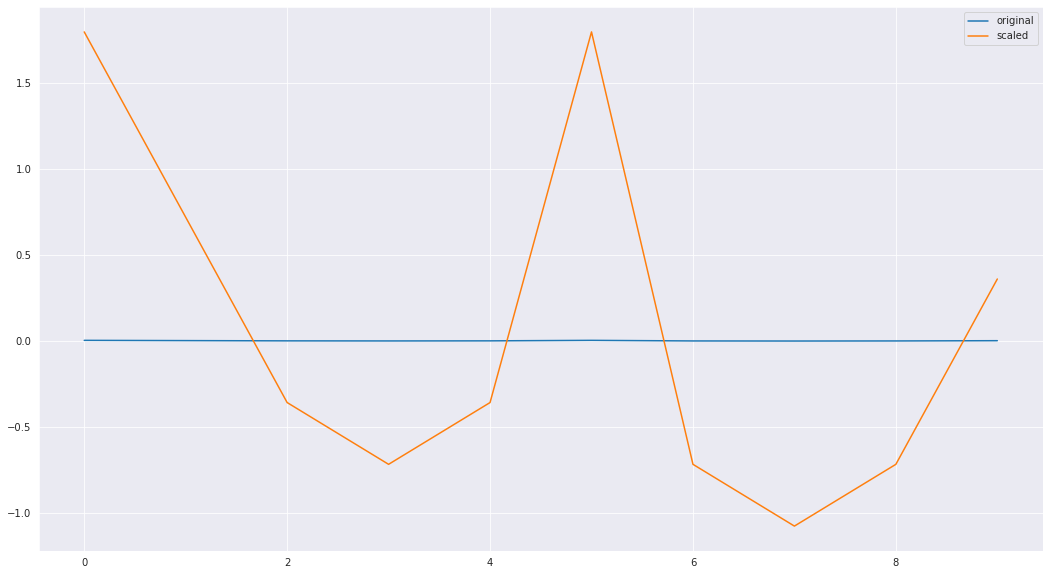

In [23]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

In [24]:
fifa = pd.read_csv('data/fifa_18_sample_data.csv')
fifa.shape

(1000, 185)

In [25]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

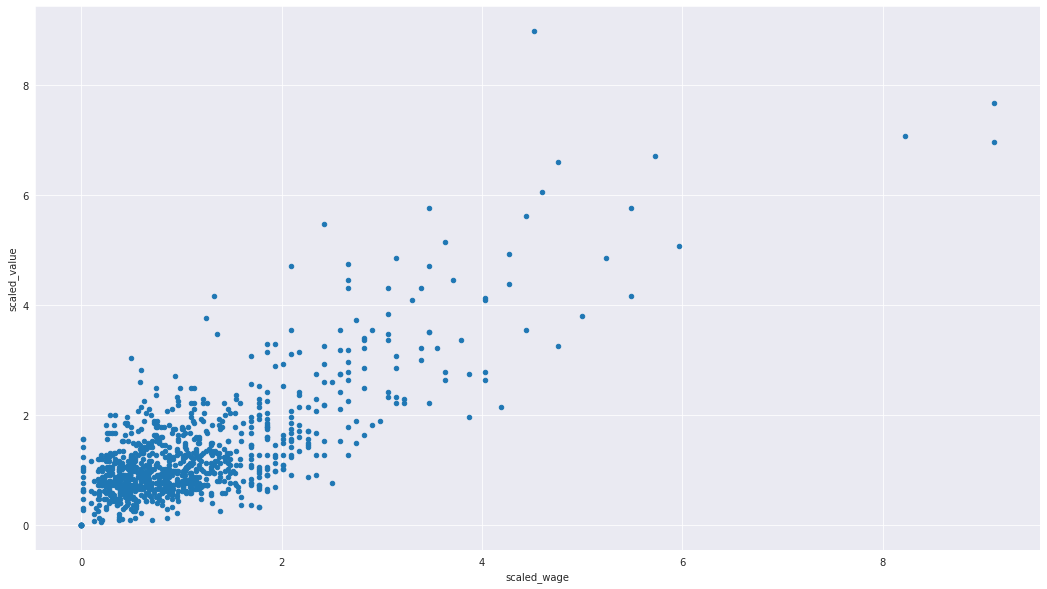

In [26]:
# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

In [27]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064
